### Web scrapped data from flipkart

### <font color=orange> About Dataset: </font>  :    
This Dataset has 4 columns:
1. Category: product_name
2. Review: review text
3. Review_title: review title
4. Ratings: ratings for the product

**Importing required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.5.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Reading the file** 

In [4]:
reviews=pd.read_csv('/content/drive/MyDrive/flipkart_reviews.csv')
reviews.head()

,Unnamed: 0,category,review,review_title,rating
0,0,redmi-mi-hi-resolution-audio-wired-headset,Kinda good with great sound effects three diff...,Slightly disappointed,2
1,1,redmi-mi-hi-resolution-audio-wired-headset,Very good product and sound quality is very ni...,Great product,5
2,2,redmi-mi-hi-resolution-audio-wired-headset,Redmi Earphones is the best earphones I have u...,Must buy!,5
3,3,redmi-mi-hi-resolution-audio-wired-headset,Red colour looks stunning 😍.Sound quality is c...,Good choice,4
4,4,redmi-mi-hi-resolution-audio-wired-headset,"Though I have received it today, they were run...",Delightful,4


In [5]:
reviews=reviews.drop('Unnamed: 0',axis=1) #dropping the unnamed column as it is not required
reviews.head()

,category,review,review_title,rating
0,redmi-mi-hi-resolution-audio-wired-headset,Kinda good with great sound effects three diff...,Slightly disappointed,2
1,redmi-mi-hi-resolution-audio-wired-headset,Very good product and sound quality is very ni...,Great product,5
2,redmi-mi-hi-resolution-audio-wired-headset,Redmi Earphones is the best earphones I have u...,Must buy!,5
3,redmi-mi-hi-resolution-audio-wired-headset,Red colour looks stunning 😍.Sound quality is c...,Good choice,4
4,redmi-mi-hi-resolution-audio-wired-headset,"Though I have received it today, they were run...",Delightful,4


In [6]:
reviews['rating'].unique()

array([  2,   5,   4,   1,   3,  45,  55, 538, 564])

In [7]:
#rating=3 is neutral so dropping it Also
#dropping rows with values 3,45,55,538,564
reviews= reviews[(reviews['rating']!=3) & (reviews['rating']!=45) & (reviews['rating']!=55) & (reviews['rating']!=538) & (reviews['rating']!=564)]

In [8]:
reviews['rating'].unique()  #checking the rating values currently present in the dataset

array([2, 5, 4, 1])

In [9]:
score = {1:'negative', 2:'negative', 4:'positive', 5:'positive'}

reviews['sentiment'] = reviews['rating'].map(score)     #mapping rating with sentiment


In [10]:
reviews.head()

,category,review,review_title,rating,sentiment
0,redmi-mi-hi-resolution-audio-wired-headset,Kinda good with great sound effects three diff...,Slightly disappointed,2,negative
1,redmi-mi-hi-resolution-audio-wired-headset,Very good product and sound quality is very ni...,Great product,5,positive
2,redmi-mi-hi-resolution-audio-wired-headset,Redmi Earphones is the best earphones I have u...,Must buy!,5,positive
3,redmi-mi-hi-resolution-audio-wired-headset,Red colour looks stunning 😍.Sound quality is c...,Good choice,4,positive
4,redmi-mi-hi-resolution-audio-wired-headset,"Though I have received it today, they were run...",Delightful,4,positive


##### Now we have all the columns  required for the analysis

## **Cleaning the text data**

In [11]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [16]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [17]:
def clean_text(text):
    # lower text
    text = text.lower().replace('[^a-zA-Z]', ' ').encode('ascii', 'ignore').decode('ascii').replace('read','')
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return text

# clean text data
reviews["review_clean"] = reviews["review"].apply(lambda x: clean_text(x))

In [18]:
reviews.head()

,category,review,review_title,rating,sentiment,review_clean
0,redmi-mi-hi-resolution-audio-wired-headset,Kinda good with great sound effects three diff...,Slightly disappointed,2,negative,kinda good great sound effect three different ...
1,redmi-mi-hi-resolution-audio-wired-headset,Very good product and sound quality is very ni...,Great product,5,positive,good product sound quality nice happy buying p...
2,redmi-mi-hi-resolution-audio-wired-headset,Redmi Earphones is the best earphones I have u...,Must buy!,5,positive,redmi earphone best earphone use rupee provide...
3,redmi-mi-hi-resolution-audio-wired-headset,Red colour looks stunning 😍.Sound quality is c...,Good choice,4,positive,red colour look stun sound quality crystal cle...
4,redmi-mi-hi-resolution-audio-wired-headset,"Though I have received it today, they were run...",Delightful,4,positive,though receive today run late delivery date ye...


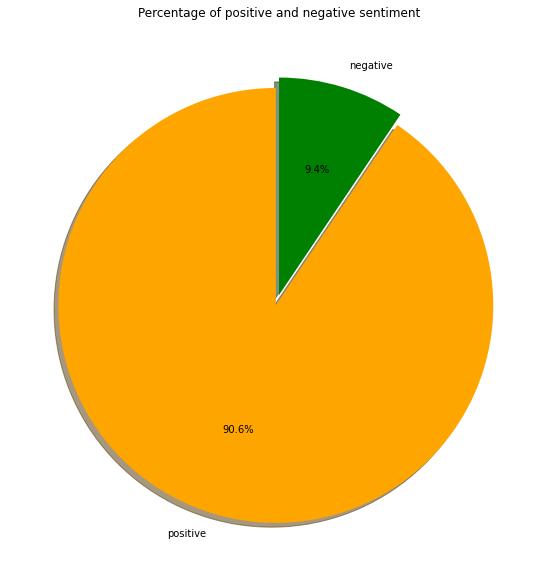

In [19]:
labels =reviews['sentiment'].value_counts(sort = True).index
sizes = reviews['sentiment'].value_counts(sort = True)
 
colors = ["orange","green"]
explode = (0.05,0) 
  
plt.figure(figsize=(15,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
 
plt.title('Percentage of positive and negative sentiment')
plt.show()

## **Tagging parts of speech** 

In [20]:
from textblob import TextBlob
blob = TextBlob(str(reviews['review_clean']))
pos_df=pd.DataFrame(blob.tags, columns=['Word', 'POS tag'])

Text(0, 0.5, 'count')

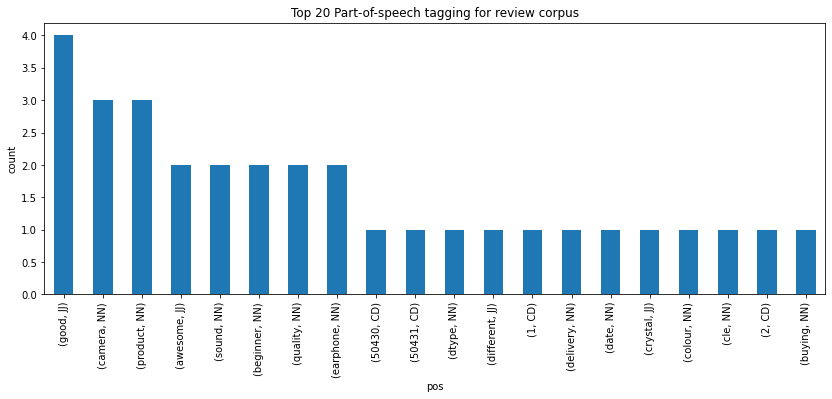

In [21]:
pos_df = pos_df.value_counts()[:20]
plt.figure(figsize=(14,5))
pos_df.plot(
    kind='bar',
    title='Top 20 Part-of-speech tagging for review corpus')
plt.xlabel('pos')
plt.ylabel('count')

## **Sentiment Analysis using Sentiment Intensity Analyzer [Vader]**

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
reviews["sentiment_vader"] = reviews["review_clean"].apply(lambda x: analyzer.polarity_scores(x))

In [24]:
reviews[['review_clean','sentiment_vader']].head()

,review_clean,sentiment_vader
0,kinda good great sound effect three different ...,"{'neg': 0.045, 'neu': 0.641, 'pos': 0.314, 'co..."
1,good product sound quality nice happy buying p...,"{'neg': 0.0, 'neu': 0.347, 'pos': 0.653, 'comp..."
2,redmi earphone best earphone use rupee provide...,"{'neg': 0.0, 'neu': 0.504, 'pos': 0.496, 'comp..."
3,red colour look stun sound quality crystal cle...,"{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp..."
4,though receive today run late delivery date ye...,"{'neg': 0.049, 'neu': 0.638, 'pos': 0.313, 'co..."


In [25]:
reviews['sentiment_vader']

0        {'neg': 0.045, 'neu': 0.641, 'pos': 0.314, 'co...
1        {'neg': 0.0, 'neu': 0.347, 'pos': 0.653, 'comp...
2        {'neg': 0.0, 'neu': 0.504, 'pos': 0.496, 'comp...
3        {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...
4        {'neg': 0.049, 'neu': 0.638, 'pos': 0.313, 'co...
                               ...                        
50430    {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...
50431    {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...
50432    {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...
50433    {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...
50434    {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...
Name: sentiment_vader, Length: 46940, dtype: object

In [26]:
reviews= pd.concat([reviews.drop(['sentiment_vader'], axis=1), reviews['sentiment_vader'].apply(pd.Series)], axis=1)
reviews[['review_clean','compound']]

,review_clean,compound
0,kinda good great sound effect three different ...,0.7980
1,good product sound quality nice happy buying p...,0.8555
2,redmi earphone best earphone use rupee provide...,0.9766
3,red colour look stun sound quality crystal cle...,0.6908
4,though receive today run late delivery date ye...,0.8849
...,...,...
50430,awesome product beginner,0.6249
50431,first camera good,0.4404
50432,good product,0.4404
50433,per budget entry level beginner special camera...,0.4019


In [27]:
reviews['compound_sentiment']=reviews['compound'].apply(lambda c:'positive' if c>=0 else'negative')
reviews[['review_clean','compound','compound_sentiment']].head()

,review_clean,compound,compound_sentiment
0,kinda good great sound effect three different ...,0.7980,positive
1,good product sound quality nice happy buying p...,0.8555,positive
2,redmi earphone best earphone use rupee provide...,0.9766,positive
3,red colour look stun sound quality crystal cle...,0.6908,positive
4,though receive today run late delivery date ye...,0.8849,positive


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(reviews['sentiment'],reviews['compound_sentiment'])

0.9384533446953558

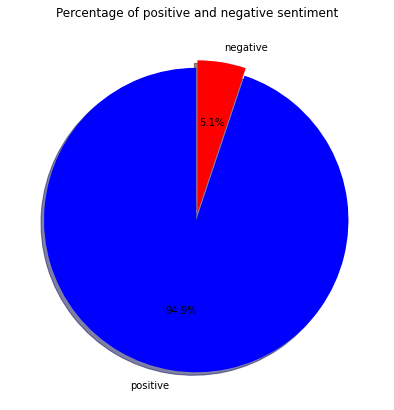

In [29]:
labels =reviews['compound_sentiment'].value_counts(sort = True).index
sizes = reviews['compound_sentiment'].value_counts(sort = True)
 
colors = ["blue","red"]
explode = (0.05,0) 
  
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
 
plt.title('Percentage of positive and negative sentiment')
plt.show()

In [30]:
# add number of words column
reviews["nb_words"] = reviews["review_clean"].apply(lambda x: len(x.split(" ")))

In [31]:
# highest positive sentiment reviews (with more than 5 words)
reviews[reviews["nb_words"] >= 5].sort_values("pos", ascending = False)[["review_clean", "pos"]].head(10)

,review_clean,pos
25016,best best best best best,1.000
38581,super super super super super,1.000
38565,super super super super super,1.000
33511,super super super excellent work,0.939
25720,best best fabulous nice performance,0.936
30377,super excellent fantastic value money,0.932
28035,nice hand comfortable really love,0.932
34010,comfortable cool product best prize,0.929
50363,great good product original happy,0.929
7343,good nice one like good,0.917


In [32]:
# lowest negative sentiment reviews (with more than 5 words)
reviews[reviews["nb_words"] >= 5].sort_values("neg", ascending = False)[["review_clean", "neg"]].head(10)

,review_clean,neg
35881,bad bad bad waste money,0.930
35897,bad bad bad waste money,0.930
26888,wheel bad mouse noisy shaken,0.765
1533,bad product bad flipkart police,0.700
24370,bad product...and bad claim warranty,0.700
11438,bad product bad delivery experience,0.700
29432,bad product buy ver bad,0.700
29423,bad product buy ver bad,0.700
3067,poor quality poor sound quality poor bass,0.699
40169,completely bad product waste money,0.696


In [33]:
reviews["rating"].value_counts()

5    0.669685
4    0.236025
1    0.068321
2    0.025969
Name: rating, dtype: float64

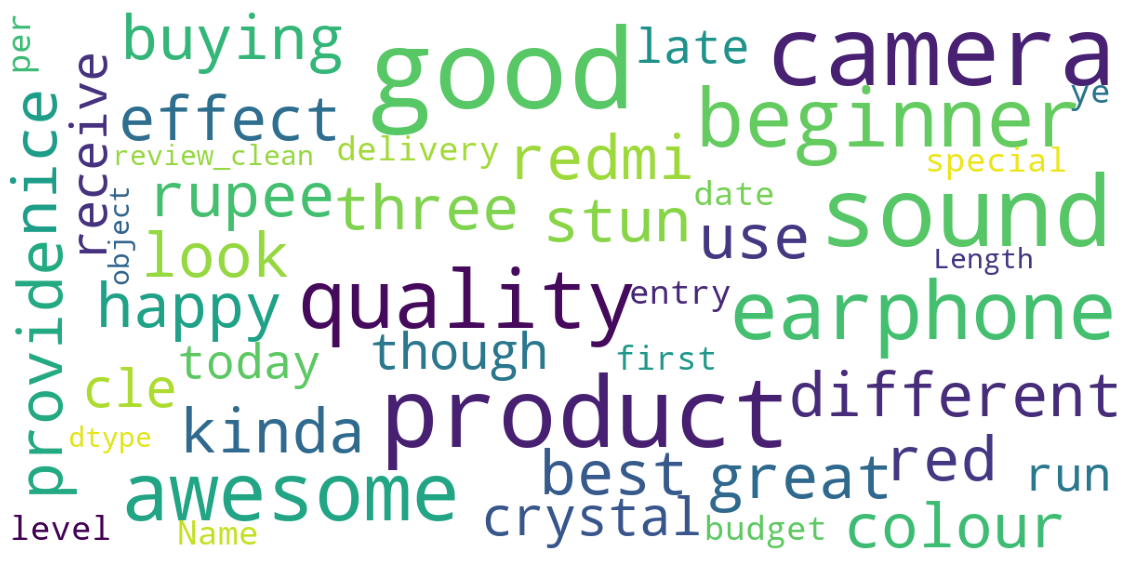

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 2000,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews["review_clean"])

## **Text classification**

In [35]:
score_card = pd.DataFrame(columns=['Model_Name', 'Accuracy', 'F1 score'])

def update_score_card(ensemble_technique,model):
  global score_card
  score_card = score_card.append({'Model_Name': ensemble_technique,
                       'Accuracy': accuracy_score(y_test, test_pred), 
                       'F1 score': f1_score(y_test, test_pred,average="weighted")}, 
                       ignore_index = True)

**Multinomial NB**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

docs=pd.Series(reviews['review_clean'])
x_train, x_test, y_train, y_test = train_test_split(docs, reviews['sentiment'],
                                                   test_size=0.2, random_state=1)

vectorizer = CountVectorizer(min_df=5).fit(x_train)
test_dtm = vectorizer.transform(x_test)
vocab = vectorizer.get_feature_names()
train_dtm = vectorizer.transform(x_train)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,f1_score


mnb_model = MultinomialNB().fit(train_dtm, y_train)
test_pred = mnb_model.predict(test_dtm)
print('Accuracy: ', accuracy_score(y_test, test_pred))
print('F1 score:',f1_score(y_test, test_pred,average="weighted"))
print('classification report:\n',classification_report(y_test, test_pred))

Accuracy:  0.9523860247123989
F1 score: 0.951070777075724
classification report:
               precision    recall  f1-score   support

    negative       0.77      0.68      0.72       845
    positive       0.97      0.98      0.97      8543

    accuracy                           0.95      9388
   macro avg       0.87      0.83      0.85      9388
weighted avg       0.95      0.95      0.95      9388



In [37]:
update_score_card(ensemble_technique = 'MultinomialNB', model = mnb_model)
score_card

,Model_Name,Accuracy,F1 score
0,MultinomialNB,0.952386,0.951071


**Logistic Regression** 

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(train_dtm, y_train)
test_pred= lr.predict(test_dtm)
print('Accuracy: ', accuracy_score(y_test, test_pred))
print('F1 score:',f1_score(y_test, test_pred,average="weighted"))
print('classification report:\n',classification_report(y_test, test_pred))

Accuracy:  0.9604814657008948
F1 score: 0.958291421883431
classification report:
               precision    recall  f1-score   support

    negative       0.86      0.67      0.75       845
    positive       0.97      0.99      0.98      8543

    accuracy                           0.96      9388
   macro avg       0.91      0.83      0.87      9388
weighted avg       0.96      0.96      0.96      9388



In [39]:
update_score_card(ensemble_technique = 'LogisticRegression', model = lr)
score_card

,Model_Name,Accuracy,F1 score
0,MultinomialNB,0.952386,0.951071
1,LogisticRegression,0.960481,0.958291


**Random Forest Classifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf_model = rf.fit(train_dtm,y_train)

test_pred = rf_model.predict(test_dtm)
print('Accuracy: ', accuracy_score(y_test, test_pred))
print('F1 score:',f1_score(y_test, test_pred,average="weighted"))
print('classification report:\n',classification_report(y_test, test_pred))

Accuracy:  0.9590967192160205
F1 score: 0.9587402269869331
classification report:
               precision    recall  f1-score   support

    negative       0.78      0.75      0.77       845
    positive       0.98      0.98      0.98      8543

    accuracy                           0.96      9388
   macro avg       0.88      0.87      0.87      9388
weighted avg       0.96      0.96      0.96      9388



In [41]:
update_score_card(ensemble_technique = 'RandomForestClassifier', model = rf_model)
score_card

,Model_Name,Accuracy,F1 score
0,MultinomialNB,0.952386,0.951071
1,LogisticRegression,0.960481,0.958291
2,RandomForestClassifier,0.959097,0.958740


**Decision Tree Classifier**

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
dt_model = dt.fit(train_dtm, y_train)
test_pred = dt_model.predict(test_dtm)
print('Accuracy: ', accuracy_score(y_test, test_pred))
print('F1 score:',f1_score(y_test, test_pred,average="weighted"))
print('classification report:\n',classification_report(y_test, test_pred))

Accuracy:  0.9530251384746485
F1 score: 0.9533331040036583
classification report:
               precision    recall  f1-score   support

    negative       0.73      0.75      0.74       845
    positive       0.98      0.97      0.97      8543

    accuracy                           0.95      9388
   macro avg       0.85      0.86      0.86      9388
weighted avg       0.95      0.95      0.95      9388



In [43]:
update_score_card(ensemble_technique = 'DecisionTreeClassifier', model = dt_model)
score_card

,Model_Name,Accuracy,F1 score
0,MultinomialNB,0.952386,0.951071
1,LogisticRegression,0.960481,0.958291
2,RandomForestClassifier,0.959097,0.958740
3,DecisionTreeClassifier,0.953025,0.953333


**XG Boost Classifier**

In [44]:
from xgboost import XGBClassifier
xgb=XGBClassifier(max_depth = 3,gamma=3,learning_rate=0.3)
xgb_model = xgb.fit(train_dtm, y_train)
test_pred = xgb_model.predict(test_dtm)
print('Accuracy: ', accuracy_score(y_test, test_pred))
print('F1 score:',f1_score(y_test, test_pred,average="weighted"))
print('classification report:\n',classification_report(y_test, test_pred))

Accuracy:  0.9536642522368982
F1 score: 0.949082700076068
classification report:
               precision    recall  f1-score   support

    negative       0.88      0.57      0.69       845
    positive       0.96      0.99      0.97      8543

    accuracy                           0.95      9388
   macro avg       0.92      0.78      0.83      9388
weighted avg       0.95      0.95      0.95      9388



In [45]:
update_score_card(ensemble_technique = 'XGBClassifier', model = xgb_model)
score_card

,Model_Name,Accuracy,F1 score
0,MultinomialNB,0.952386,0.951071
1,LogisticRegression,0.960481,0.958291
2,RandomForestClassifier,0.959097,0.958740
3,DecisionTreeClassifier,0.953025,0.953333
4,XGBClassifier,0.953664,0.949083


## **Sentiment Analysis using LSTM**

In [46]:
# Keeping only the neccessary columns
data = reviews[['review','sentiment']]
data.head()

,review,sentiment
0,Kinda good with great sound effects three diff...,negative
1,Very good product and sound quality is very ni...,positive
2,Redmi Earphones is the best earphones I have u...,positive
3,Red colour looks stunning 😍.Sound quality is c...,positive
4,"Though I have received it today, they were run...",positive


In [47]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


data['review'] = data['review'].apply(lambda x: x.lower())
data['review'] = data['review'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['sentiment'] == 'positive'].size)
print(data[ data['sentiment'] == 'negative'].size)

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
vocabSize = 2000
tokenizer = Tokenizer(num_words=vocabSize, split=' ')
tokenizer.fit_on_texts(data['review'].values)
X = tokenizer.texts_to_sequences(data['review'].values)
X = pad_sequences(X)

85028
8852


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(vocabSize, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 95, 128)           256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 95, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(39899, 95) (39899, 2)
(7041, 95) (7041, 2)


In [50]:
lstm = model.fit(X_train, Y_train, epochs = 10, batch_size=100, validation_data = (X_test,Y_test), verbose = 1)

Epoch 1/10
399/399 [==============================] - 175s 425ms/step - loss: 0.1711 - accuracy: 0.9428 - val_loss: 0.1047 - val_accuracy: 0.9649
Epoch 2/10
399/399 [==============================] - 168s 420ms/step - loss: 0.0957 - accuracy: 0.9697 - val_loss: 0.0954 - val_accuracy: 0.9688
Epoch 3/10
399/399 [==============================] - 167s 418ms/step - loss: 0.0801 - accuracy: 0.9756 - val_loss: 0.0936 - val_accuracy: 0.9709
Epoch 4/10
399/399 [==============================] - 166s 417ms/step - loss: 0.0713 - accuracy: 0.9782 - val_loss: 0.0924 - val_accuracy: 0.9712
Epoch 5/10
399/399 [==============================] - 167s 419ms/step - loss: 0.0665 - accuracy: 0.9802 - val_loss: 0.0914 - val_accuracy: 0.9722
Epoch 6/10
399/399 [==============================] - 167s 418ms/step - loss: 0.0632 - accuracy: 0.9814 - val_loss: 0.0972 - val_accuracy: 0.9703
Epoch 7/10
399/399 [==============================] - 165s 413ms/step - loss: 0.0598 - accuracy: 0.9820 - val_loss: 0.0980 -

In [51]:
model.evaluate(X_test, Y_test) 

221/221 [==============================] - 6s 27ms/step - loss: 0.1058 - accuracy: 0.9719


[0.10582593828439713, 0.9718790054321289]

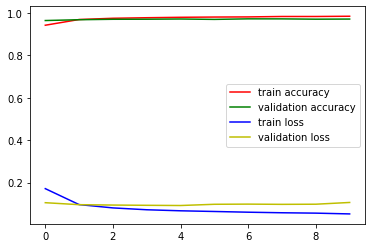

In [52]:
plt.plot(lstm.history['accuracy'],'r',label='train accuracy')
plt.plot(lstm.history['val_accuracy'],'g',label='validation accuracy')
plt.plot(lstm.history['loss'],'b',label='train loss')
plt.plot(lstm.history['val_loss'],'y',label='validation loss')
plt.legend()
plt.show()


In [53]:
import numpy as np

pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0

for x in range(len(X_test)):
    
    result = model.predict(X_test[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 1)[0]
   
    if np.argmax(result) == np.argmax(Y_test[x]):
        if np.argmax(Y_test[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_test[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1

print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

Streaming output truncated to the last 5000 lines.
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 

In [54]:
sentence = ['good quality sound crisp clear audio']

#vectorizing the sentence by the pre-fitted tokenizer instance
token = tokenizer.texts_to_sequences(sentence)

#padding the token to have exactly the same shape as `embedding_2` input
token = pad_sequences(token, maxlen=28, dtype='int32', value=0)
print(token)

sentiment = model.predict(token,batch_size=1,verbose = 2)[0]
if (np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    2   23   74 1626  547  764]]
1/1 - 0s
positive


In [55]:
sentence = ['bad product']

#vectorizing the sentence by the pre-fitted tokenizer instance
token = tokenizer.texts_to_sequences(sentence)

#padding the token to have exactly the same shape as `embedding_2` input
token = pad_sequences(token, maxlen=28, dtype='int32', value=0)
print(token)

sentiment = model.predict(token,batch_size=1,verbose = 2)[0]
if (np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0 85  4]]
1/1 - 0s
negative
